In [ ]:
  import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import models,layers
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Flatten,Dense,Dropout
from keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/fer_ckplus_kdef/0/AF03ANS.png')

In [ ]:
img_array.shape

(224, 224, 3)

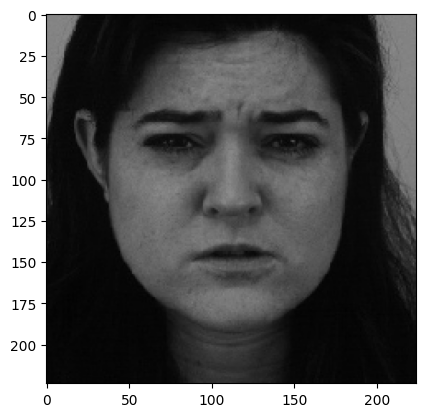

In [ ]:
plt.imshow(img_array)

In [ ]:
Datadirectory="/content/drive/MyDrive/fer_ckplus_kdef"
Classes=["0","1","2","3","4","5","6"]
Validdirectory="/content/drive/MyDrive/dane_FER2013/test/"

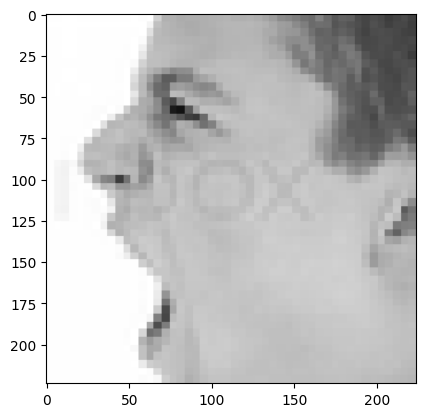

In [ ]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

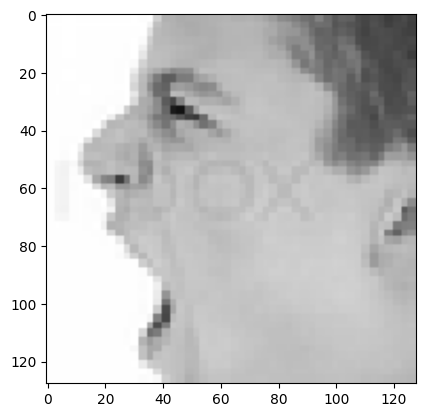

In [ ]:
img_size=128
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape


(128, 128, 3)

In [ ]:
new_array

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]]

Wczytanie wszystkich zdjec i konwersja na macierze

In [ ]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
validation_Data = []
def create_validation_Data():
    for category in Classes:
        path=os.path.join(Validdirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                validation_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
create_training_Data()

In [ ]:
create_validation_Data()

In [ ]:
print(len(training_Data))

32717


In [ ]:
print(len(validation_Data))

7178


In [ ]:
import random
random.shuffle(training_Data)


In [ ]:
X = [] #dane
y = [] #etykiety
for features, label in training_Data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,3)
y=np.array(y)

In [ ]:
X_validate=[]
y_validate=[]
for features, label in validation_Data:
    X_validate.append(features)
    y_validate.append(label)

X_validate=np.array(X_validate).reshape(-1,img_size,img_size,3)
y_validate=np.array(y_validate)

In [ ]:
X.shape

(32717, 128, 128, 3)

In [ ]:
X= X/255.0;
X_validate= X_validate/255.0;

In [ ]:
#X_test=X_validate[0:3000]
#y_test=y_validate[0:3000]
#X_validate=X_validate[3000:len(X_validate)]
#y_validate=y_validate[3000:len(y_validate)]

Deep learning model

# Model konwolucyjnej sieci neuronowej (CNN)




In [ ]:
y=keras.utils.to_categorical(y,7)
y_validate=keras.utils.to_categorical(y_validate,7)

In [ ]:
model=tf.keras.models.Sequential()
model.add(Conv2D(64,3,activation='relu',input_shape=(img_size,img_size,3)))
model.add(Conv2D(64,3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,3,activation='relu'))
model.add(Conv2D(64,3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,3,activation='relu'))
model.add(Conv2D(128,3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 124, 124, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X,y,batch_size=16,epochs=32,validation_data=[X_validate,y_validate],verbose=1)

Epoch 1/32
2045/2045 [==============================] - 120s 55ms/step - loss: 2.6246 - accuracy: 0.3814 - val_loss: 1.4572 - val_accuracy: 0.4418
Epoch 2/32
2045/2045 [==============================] - 107s 52ms/step - loss: 1.3821 - accuracy: 0.4801 - val_loss: 1.3919 - val_accuracy: 0.4792
Epoch 3/32
2045/2045 [==============================] - 107s 53ms/step - loss: 1.2189 - accuracy: 0.5462 - val_loss: 2.0219 - val_accuracy: 0.3217
Epoch 4/32
2045/2045 [==============================] - 108s 53ms/step - loss: 1.1027 - accuracy: 0.5984 - val_loss: 1.3569 - val_accuracy: 0.5224
Epoch 5/32
2045/2045 [==============================] - 108s 53ms/step - loss: 0.9112 - accuracy: 0.6720 - val_loss: 1.1558 - val_accuracy: 0.5874
Epoch 6/32
2045/2045 [==============================] - 108s 53ms/step - loss: 0.7239 - accuracy: 0.7452 - val_loss: 0.8706 - val_accuracy: 0.7244
Epoch 7/32
2045/2045 [==============================] - 109s 53ms/step - loss: 0.5431 - accuracy: 0.8112 - val_loss: 0

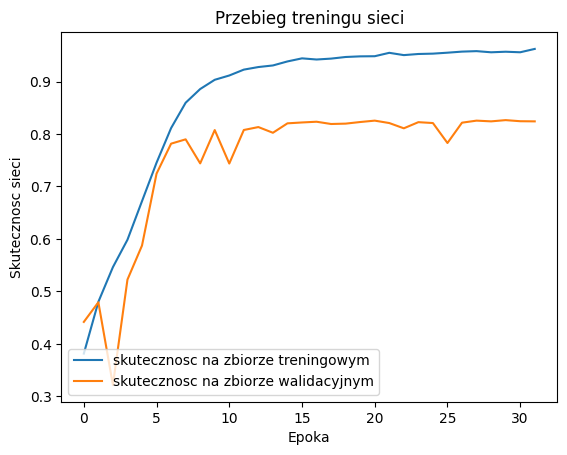

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Przebieg treningu sieci')
plt.ylabel('Skutecznosc sieci')
plt.xlabel('Epoka')
plt.legend(['skutecznosc na zbiorze treningowym', 'skutecznosc na zbiorze walidacyjnym'], loc='lower left')
plt.show()
#model.save('/content/drive/MyDrive/Colab Notebooks/model_rozpoznawanie_emocji_moj_2.keras')

model.save('/content/drive/MyDrive/Colab Notebooks/model_rozpoznawanie_emocji_moj_2.h5')